In [1]:
# load a .pth model file and use it to extract features from images

import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import yaml
import cv2
from load_model import load_model_from_opts



d:\Project\Smart-Vehicle-Tracking\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

model = load_model_from_opts('opts.yaml',ckpt='net_19.pth', remove_classifier=True)
model.eval()



Using IBN-Net Resnet50


Using cache found in C:\Users\RAVI BABU/.cache\torch\hub\XingangPan_IBN-Net_master


ft_net(
  (model): ResNet_IBN(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck_IBN(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): IBN(
          (IN): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-

In [4]:


# load an image
img = Image.open('../car4.png').convert('RGB')
plt.imshow(img)
# print(img.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../car4.png'

In [ ]:
def fliplr(img):
    """flip images horizontally in a batch"""
    inv_idx = torch.arange(img.size(3) - 1, -1, -1).long()
    inv_idx = inv_idx.to(img.device)
    img_flip = img.index_select(3, inv_idx)
    return img_flip


def extract_feature(model, X, device="cuda"):
    """Exract the embeddings of a single image tensor X"""
    if len(X.shape) == 3:
        X = torch.unsqueeze(X, 0)
    X = X.to(device)
    feature = model(X).reshape(-1)

    X = fliplr(X)
    flipped_feature = model(X).reshape(-1)
    feature += flipped_feature

    fnorm = torch.norm(feature, p=2)
    return feature.div(fnorm)






In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224), interpolation=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
query_image = torch.unsqueeze(data_transforms(img), 0)
query_feature = extract_feature(model, query_image, device="cpu")
print(query_feature)

tensor([ 1.2981e-03,  3.1740e-02, -3.4064e-02,  1.8130e-02, -4.9826e-02,
        -1.2624e-02, -1.4848e-02,  4.5023e-02,  1.6131e-03,  5.5840e-02,
        -2.5911e-02,  6.2283e-02, -3.2804e-02,  8.1938e-02, -7.1684e-02,
        -2.9686e-02, -2.9448e-04, -1.3356e-02, -8.7183e-02,  4.2569e-03,
        -5.5144e-02, -5.9653e-02, -2.4444e-02, -4.8370e-02, -3.2032e-02,
         2.7511e-02, -3.1912e-02, -3.1669e-02,  1.3897e-02, -6.6444e-02,
         2.0852e-02,  3.3508e-03,  1.5220e-02, -2.8116e-02,  5.2065e-02,
        -1.9854e-02, -1.3349e-02,  5.8978e-02,  3.8311e-02, -2.2553e-02,
         1.1676e-01, -7.2705e-02, -7.9799e-03, -3.2375e-02,  2.3527e-02,
        -2.2372e-02, -1.3786e-02, -1.4088e-01, -2.0875e-02, -7.4832e-02,
         3.2986e-02,  3.4640e-03, -9.8796e-03,  1.4983e-01, -1.4887e-01,
         1.4873e-02,  8.6180e-02,  2.3475e-03,  4.5761e-02, -1.0229e-01,
        -6.5780e-02,  1.6207e-02, -2.9143e-03,  9.3256e-02,  4.5207e-02,
        -1.0016e-02,  7.2581e-03,  3.5831e-02, -6.1

tensor([ 1.2283e-02,  4.4005e-02, -1.8323e-02, -1.6997e-02, -6.0761e-02,
        -2.4677e-02, -8.6268e-03,  2.0384e-02, -2.2085e-02,  5.3295e-02,
        -4.9991e-02,  4.6132e-02, -9.3963e-03,  8.8000e-02, -4.9227e-02,
        -6.5845e-02, -2.0809e-02,  1.7568e-02, -4.9443e-02,  3.4449e-02,
        -4.2169e-02, -8.7086e-02, -2.9715e-03, -5.2682e-03, -3.1010e-02,
         1.5242e-02, -5.8277e-02, -4.8707e-02, -6.4662e-03, -5.1365e-02,
         9.8630e-03, -3.9035e-02,  1.3974e-02,  4.1699e-03,  3.3354e-02,
        -2.2546e-02, -3.0389e-02,  6.8371e-02,  3.9946e-02,  1.3237e-02,
         4.1607e-02, -8.2868e-02, -5.1730e-02, -3.5982e-02,  1.2389e-02,
        -5.6948e-03,  4.9767e-02, -8.8852e-02,  5.3979e-04, -2.4083e-02,
         2.6695e-02, -1.3550e-02, -4.0002e-02,  1.1934e-01, -8.2362e-02,
        -1.8345e-02,  5.4538e-02, -2.1308e-02,  4.1325e-02, -8.7134e-02,
        -3.1375e-02,  1.3532e-02, -2.3423e-02,  6.1705e-02,  2.7660e-02,
         1.9163e-02,  1.5441e-02,  1.7374e-02, -6.6

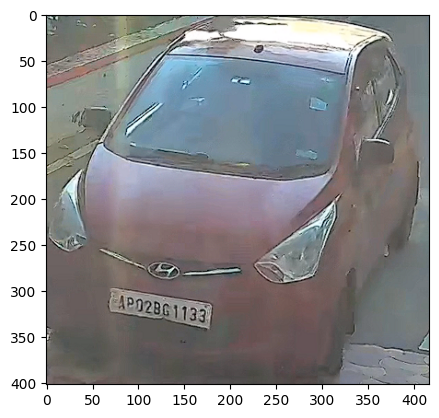

In [ ]:
img2 = Image.open('../car1.png').convert('RGB')
plt.imshow(img2)
query_image2 = torch.unsqueeze(data_transforms(img2), 0)
query_feature2 = extract_feature(model, query_image2, device="cpu")
print(query_feature2)

In [ ]:
def get_score(query_feature, image_feature):
    # similarity of two features vectors for reid
    query_feature = query_feature
    image_feature = image_feature
    score = torch.dot(query_feature, image_feature).detach().numpy()

    return score

In [ ]:
def getSimilarity(image1,image2):
    query_image = torch.unsqueeze(data_transforms(image1), 0)
    query_feature = extract_feature(model, query_image, device="cpu")
    query_image2 = torch.unsqueeze(data_transforms(image2), 0)
    query_feature2 = extract_feature(model, query_image2, device="cpu")
    return get_score(query_feature,query_feature2)

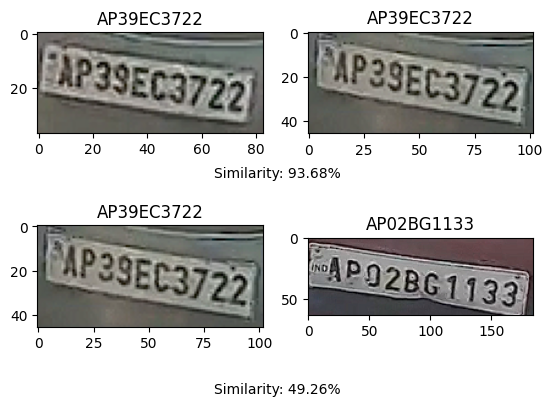

0.49259743


In [ ]:
image1 = Image.open('../number_plate1.png').convert('RGB')
image2 = Image.open('../number_plate2.png').convert('RGB')
image3 = Image.open('../number_plate2.png').convert('RGB')
image4 = Image.open('../number_plate5.png').convert('RGB')

# plot the images side by side
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('AP39EC3722')
ax1.imshow(image1)
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('AP39EC3722')
ax2.imshow(image2)
similarity = getSimilarity(image1,image2)
# write the result on the bottom
fig.text(0.5, 0.5, 'Similarity: ' + str(round(similarity*100, 2))+'%', ha='center')

# add height space between images
fig.subplots_adjust(hspace=0.1)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('AP39EC3722')
ax3.imshow(image3)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('AP02BG1133')
ax4.imshow(image4)

similarity = getSimilarity(image3,image4)
# write the result on the bottom
fig.text(0.5, 0.05, 'Similarity: ' + str(round(similarity*100, 2))+'%', ha='center')




plt.show()


print(similarity)

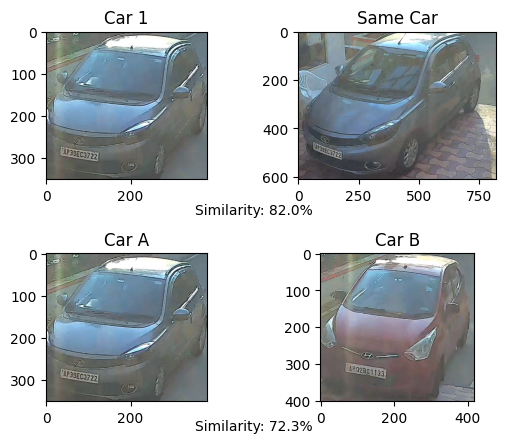

0.7229558


In [ ]:
image1 = Image.open('../car4.png').convert('RGB')
image2 = Image.open('../car5.png').convert('RGB')

image3 = Image.open('../car4.png').convert('RGB')
image4 = Image.open('../car1.png').convert('RGB')

# plot the images side by side
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Car 1')
ax1.imshow(image1)
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Same Car')
ax2.imshow(image2)
similarity = getSimilarity(image1,image2)
# write the result on the bottom
fig.text(0.5, 0.5, 'Similarity: ' + str(round(similarity*100, 2))+'%', ha='center')

# add height space between images
fig.subplots_adjust(hspace=0.5)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Car A')
ax3.imshow(image3)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Car B')
ax4.imshow(image4)

similarity = getSimilarity(image3,image4)
# write the result on the bottom
fig.text(0.5, 0.05, 'Similarity: ' + str(round(similarity*100, 2))+'%', ha='center')




plt.show()


print(similarity)